In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt

#### **LOAD + PREP DATA**

In [2]:
def prep_data(df, filter_yy = 1990, annualize = 'y', drop_energy = None):

    if drop_energy is not None:
        df = df.loc[~df.Description.isin([drop_energy])]

    df['month'] = df.YYYYMM % 100
    df['year'] = (np.floor(df.YYYYMM / 100)).astype(int)

    df = df.loc[df.year >= 1990]
    df.Value = df.Value.astype('float')

    if annualize == 'y':
        df = df.loc[df.month == 13]
        time_col = 'year'
    else:
        df = df.loc[df.month < 13]
        time_col = 'YYYYMM'

    df = df[[time_col, 'Description', 'Value']]
    df = df.pivot(index=time_col, columns='Description', values='Value').reset_index()


    return df


In [3]:
production = pd.read_csv('data/MER_T01_02 (Run Date 8.15.24).csv')
production = prep_data(production)

print(production.shape)
#print(production.dtypes)
production.head()


(34, 14)


/tmp/ipykernel_49864/2725860040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Value = df.Value.astype('float')


Description,year,Biomass Energy Production,Coal Production,Crude Oil Production,Geothermal Energy Production,Hydroelectric Power Production,Natural Gas (Dry) Production,Natural Gas Plant Liquids Production,Nuclear Electric Power Production,Solar Energy Production,Total Fossil Fuels Production,Total Primary Energy Production,Total Renewable Energy Production,Wind Energy Production
0,1990,2.735112,22.487548,15.571185,0.062862,0.999258,18.326155,2.138298,6.104350,0.055962,58.523186,68.490245,3.862708,0.009515
1,1991,2.781797,21.636424,15.700826,0.065478,0.986048,18.228736,2.265161,6.422132,0.058040,57.831148,68.154712,3.901431,0.010069
2,1992,2.931678,21.694132,15.222863,0.066863,0.863536,18.375100,2.322585,6.479206,0.059819,57.614681,68.025635,3.931748,0.009852
3,1993,2.908446,20.335654,14.494390,0.069883,0.957046,18.584037,2.366190,6.410499,0.061682,55.780270,66.198081,4.007312,0.010256
4,1994,3.027534,22.202083,14.102563,0.066207,0.887549,19.348013,2.349386,6.693877,0.063410,58.002045,68.752384,4.056461,0.011762


In [4]:
consumption = pd.read_csv('data/MER_T01_03 (Run Date 8.15.24).csv')
consumption = prep_data(consumption)

print(consumption.shape)
#print(consumption.dtypes)
consumption.head()

(34, 13)


/tmp/ipykernel_49864/2725860040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Value = df.Value.astype('float')


Description,year,Biomass Energy Consumption,Coal Consumption,Geothermal Energy Consumption,Hydroelectric Power Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Nuclear Electric Power Consumption,Petroleum Consumption (Excluding Biofuels),Solar Energy Consumption,Total Fossil Fuels Consumption,Total Primary Energy Consumption,Total Renewable Energy Consumption,Wind Energy Consumption
0,1990,2.735112,19.172635,0.062862,0.999258,19.603267,6.104350,33.499918,0.055962,72.280598,82.255545,3.862708,0.009515
1,1991,2.781797,18.991670,0.065478,0.986048,20.032958,6.422132,32.789101,0.058040,71.823417,82.213947,3.901431,0.010069
2,1992,2.931678,19.122471,0.066863,0.863536,20.713632,6.479206,33.467661,0.059819,73.338389,83.836077,3.931748,0.009852
3,1993,2.908172,19.835148,0.069883,0.957046,21.229000,6.410499,33.587587,0.061682,74.678844,85.191290,4.007038,0.010256
4,1994,3.027534,19.909463,0.066207,0.887549,21.728067,6.693877,34.453420,0.063410,76.149278,87.052554,4.056461,0.011762


In [5]:
net_imports = pd.read_csv('data/MER_T01_04C (Run Date 8.15.24).csv')
net_imports = prep_data(net_imports, drop_energy='Biomass Net Imports')

# Reverse to get exports
net_exports = net_imports
net_exports.loc[:, ~net_exports.columns.isin(['Description', 'year'])] = -net_exports.loc[:, ~net_exports.columns.isin(['Description', 'year'])]
net_exports.columns = [c.replace("Imports", "Exports") for c in list(net_exports.columns)]

print(net_exports.shape)
#print(net_exports.dtypes)
net_exports.head()

(34, 9)


/tmp/ipykernel_49864/2725860040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.YYYYMM % 100
/tmp/ipykernel_49864/2725860040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = (np.floor(df.YYYYMM / 100)).astype(int)


,year,Coal Coke Net Exports,Coal Net Exports,Crude Oil Net Exports,Electricity Net Exports,Natural Gas Net Exports,"Petroleum Products, Excluding Biofuels, Net Exports",Total Energy Net Exports,"Total Petroleum, Excluding Biofuels, Net Exports"
0,1990,-0.004778,2.704789,-12.536341,-0.007888,-1.463541,-2.757016,-14.064775,-15.293357
1,1991,-0.009688,2.768925,-12.307610,-0.066965,-1.666051,-1.912466,-13.193856,-14.220075
2,1992,-0.034625,2.586857,-13.065066,-0.086733,-1.940841,-1.894854,-14.435263,-14.959920
3,1993,-0.027110,1.757942,-14.541589,-0.094910,-2.254691,-1.830459,-16.991662,-16.372048
4,1994,-0.058329,1.657055,-15.130611,-0.152937,-2.518047,-2.067552,-18.271388,-17.198162


#### **ANALYSIS**

##### Check YOY Change in Net Imports of Petroleum (Excluding Biofuels)

In [6]:
net_exports[['year', 'Total Petroleum, Excluding Biofuels, Net Exports']].tail(8)

,year,"Total Petroleum, Excluding Biofuels, Net Exports"
26,2016,-11.710375
27,2017,-9.766005
28,2018,-7.066035
29,2019,-3.502390
30,2020,-0.872067
31,2021,-2.247938
32,2022,-0.118115
33,2023,0.665793


<Axes: xlabel='year'>

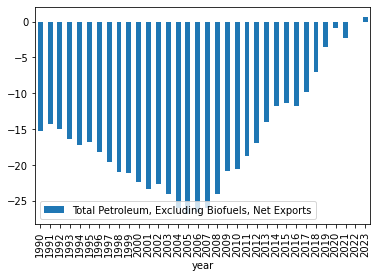

In [10]:
net_exports.plot.bar(x='year', y='Total Petroleum, Excluding Biofuels, Net Exports')

<Axes: xlabel='year'>

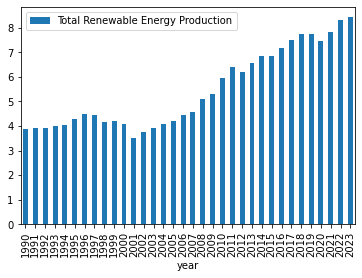

In [27]:
production.plot.bar(x='year', y='Total Renewable Energy Production')

<Axes: xlabel='year'>

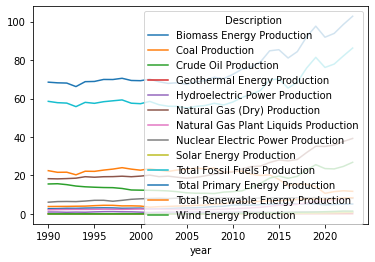

In [ ]:
production.set_index('year').plot()

<Axes: xlabel='year'>

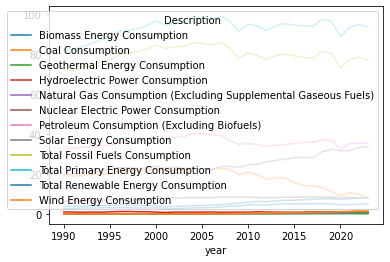

In [8]:
consumption.set_index('year').plot()

<Axes: xlabel='year'>

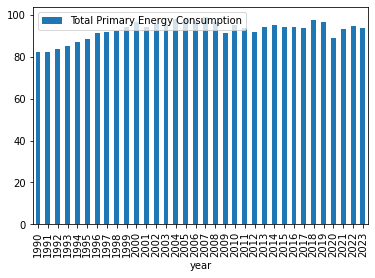

In [9]:
consumption.plot.bar(x='year', y='Total Primary Energy Consumption')


In [21]:
production[20:].plot.bar(x='year', y=production['Total Renewable Energy Production'])

KeyError: "None of [Float64Index([3.862708, 3.901431, 3.931748, 4.007312, 4.056461, 4.294583,\n              4.479994, 4.466063, 4.174139, 4.202601, 4.093033, 3.513751,\n              3.770941, 3.914186, 4.093471,  4.22016, 4.429647, 4.582116,\n              5.084563, 5.309146,  5.94258, 6.404003,  6.18697, 6.560783,\n              6.835589, 6.845927, 7.188417, 7.504595, 7.744195, 7.752818,\n              7.465203,   7.8073, 8.307341, 8.426336],\n             dtype='float64', name='Description')] are in the [columns]"